In [2]:
import sys
sys.version

'3.10.8 (main, Nov 24 2022, 08:09:04) [Clang 14.0.6 ]'

In [3]:
from utils import *

In [4]:
df_yc_m = get_yield_curve()
df_yc_m.head()

,1m,2m,3m,6m,1y,2y,3y,5y,7y,10y,20y
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.64,3.91,4.46,4.72,4.85,5.47
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.86,3.22,3.93,4.37,4.60,5.45
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.44,2.87,3.66,4.03,4.30,5.05
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.84,3.30,4.08,4.55,4.78,5.54
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.07,3.59,4.38,4.84,5.07,5.74


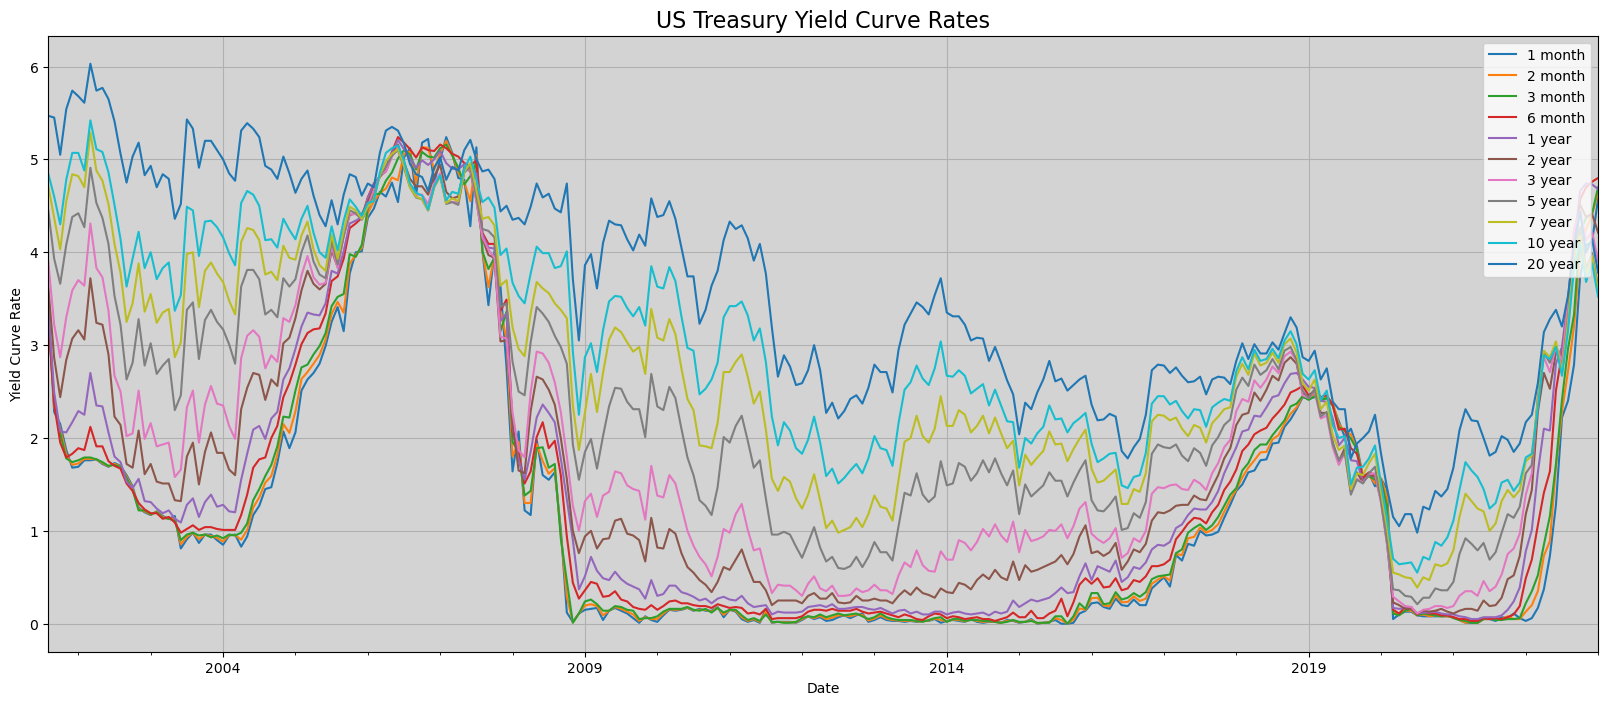

In [5]:
plot_yield_curve(df_yc_m)

In [6]:
df_zero = compute_zero_coupon(df_yc_m)
df_zero.head()

,1m_0,2m_0,3m_0,6m_0,1y_0,2y_0,3y_0,5y_0,7y_0,10y_0,20y_0
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.639807,3.909812,4.460031,4.720498,4.850970,5.512101
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.859924,3.219941,3.930495,4.371418,4.603021,5.515785
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.439957,2.869981,3.660632,4.031227,4.302993,5.101017
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.839964,3.299996,4.080791,4.551852,4.783659,5.602486
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.069962,3.590006,4.380931,4.842047,5.074012,5.799525


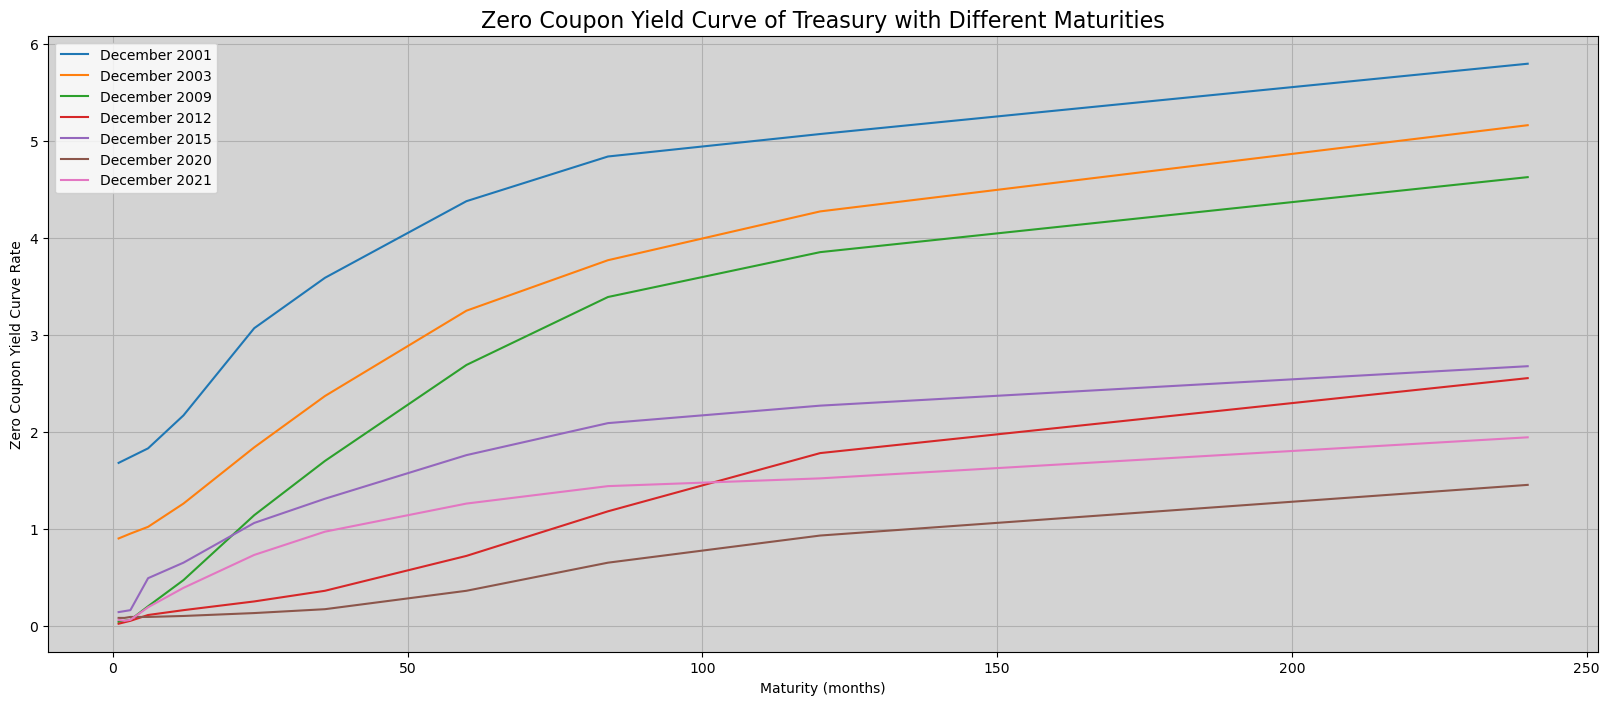

In [7]:
plot_zero_coupon_comparison(df_zero)

In [8]:
df_forward = compute_forward_yield(df_zero)
df_forward.head()

,1m_f,2m_f,3m_f,6m_f,1y_f,2y_f,3y_f,5y_f,7y_f,10y_f,20y_f
Date,,,,,,,,,,,
2001-08-31,3.40,3.37,3.355,3.292,3.410909,3.650233,3.924378,4.477998,4.736407,4.863163,5.520938
2001-09-30,2.28,2.40,2.460,2.376,2.509091,2.885138,3.246797,3.958469,4.396616,4.622543,5.529324
2001-10-31,2.15,2.05,2.000,1.910,2.062727,2.452563,2.890551,3.686235,4.053892,4.321086,5.113364
2001-11-30,1.87,1.78,1.735,1.774,2.077273,2.882137,3.340853,4.118263,4.584164,4.808143,5.618104
2001-12-31,1.68,1.74,1.770,1.860,2.214545,3.130395,3.644578,4.426709,4.880144,5.102533,5.816761


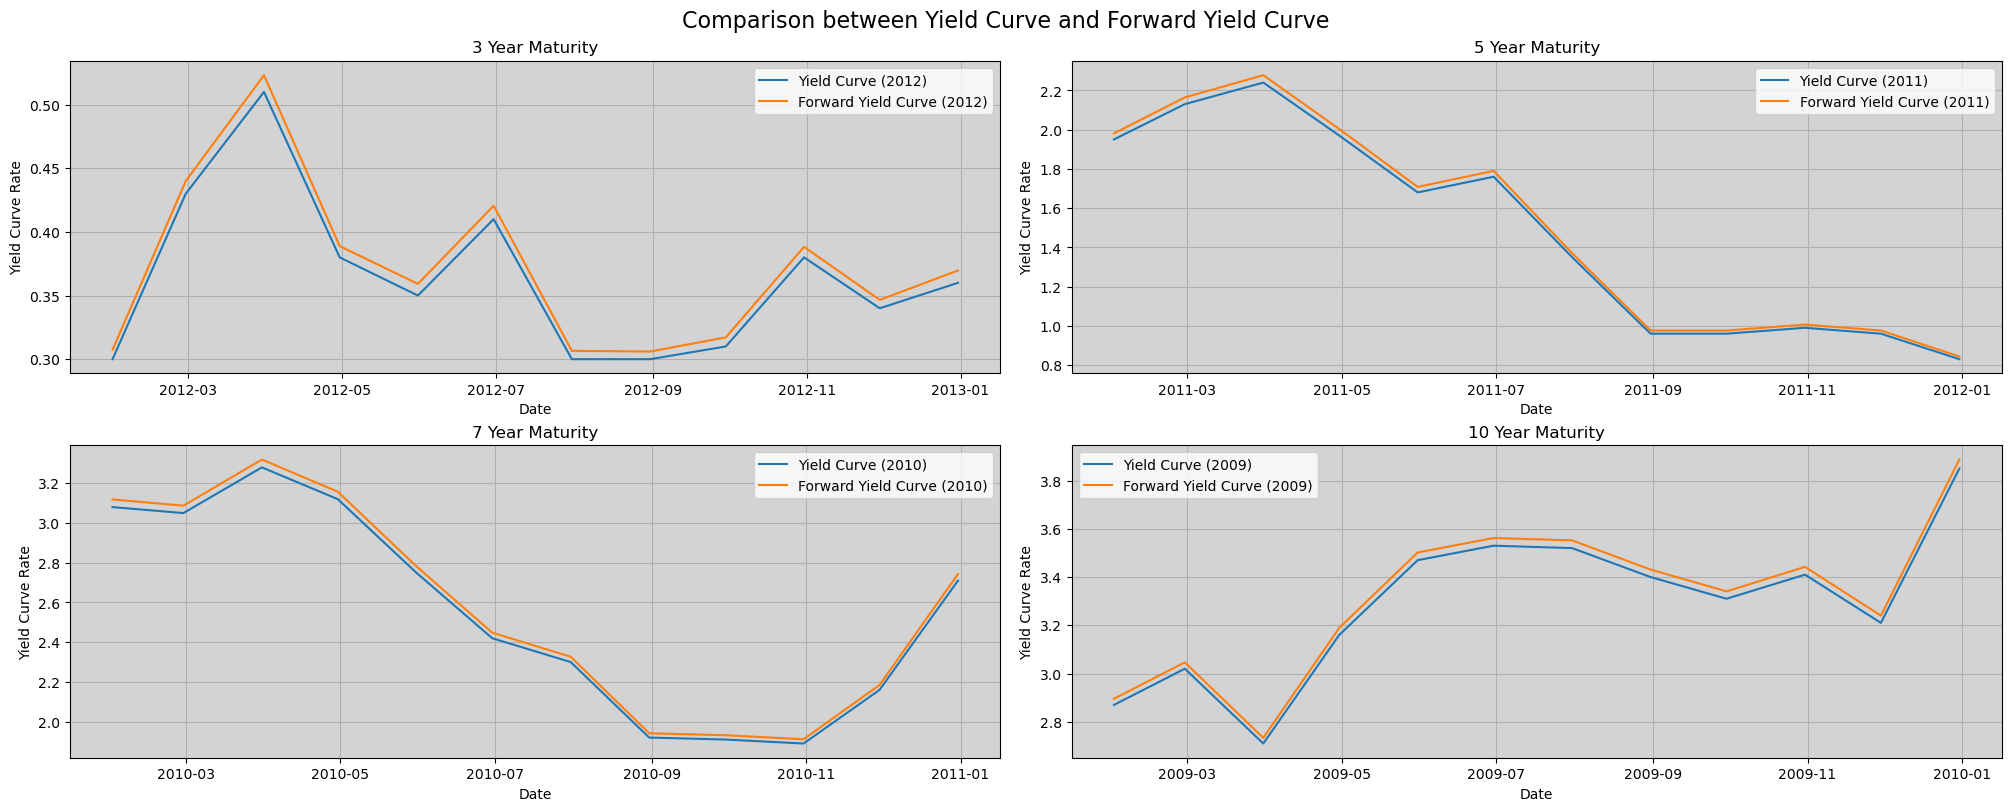

In [9]:
plot_forward_yield_comparison(df_yc_m,df_forward)

In [10]:
df_forward

,1m_f,2m_f,3m_f,6m_f,1y_f,2y_f,3y_f,5y_f,7y_f,10y_f,20y_f
Date,,,,,,,,,,,
2001-08-31,3.40,3.37,3.355,3.292,3.410909,3.650233,3.924378,4.477998,4.736407,4.863163,5.520938
2001-09-30,2.28,2.40,2.460,2.376,2.509091,2.885138,3.246797,3.958469,4.396616,4.622543,5.529324
2001-10-31,2.15,2.05,2.000,1.910,2.062727,2.452563,2.890551,3.686235,4.053892,4.321086,5.113364
2001-11-30,1.87,1.78,1.735,1.774,2.077273,2.882137,3.340853,4.118263,4.584164,4.808143,5.618104
2001-12-31,1.68,1.74,1.770,1.860,2.214545,3.130395,3.644578,4.426709,4.880144,5.102533,5.816761
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,2.79,3.61,3.600,4.146,4.164545,4.281840,4.291348,4.080193,3.982790,3.835919,4.085530
2022-10-31,3.73,4.27,4.465,4.738,4.744545,4.543426,4.470056,4.277474,4.183687,4.100058,4.447577
2022-11-30,4.07,4.43,4.520,4.826,4.800909,4.392984,4.131196,3.814160,3.754766,3.674195,4.002775
